# Python  TASK 2&3 -AIR QUALITY
## Name- Jatin Karthik
## Matriculation no.-313301 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**You are required to pre-process the datasets by following these steps:**

In [2]:
#reading the.data file as csv

Air_Q=pd.read_csv("airq402.data",delim_whitespace=True,header=None)

In [3]:
#defining the columns since the dataset had columns seperately

#Air_Q=pd.DataFrame(np.array(Air_Q), columns=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share', 'Average fare', 'Low price airline' ,'market share','price'])

Air_Q.columns=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share', 'Average fare', 'Low price airline' ,'market share','price']
Air_Q

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [4]:
# We see the correlation between various features of the dataset, we can see that Avergae fare(x2) and Distance upto a point are
#the onlt columns that positively co-relate to our target i.e Prices
# So, we can drop other columns and that is what is done further ahead in the code

Air_Q.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share,price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


**Dropping all the NA values from the dataset**

In [5]:
Air_Q.dropna(axis=0,how='any')
Air_Q


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


**Convert any non-numeric values to numeric values. For example you can replace a country name
with an integer value or more appropriately use hot-one encoding**

In [6]:
city1 = pd.get_dummies(Air_Q.City1)
pd.concat([Air_Q, city1], axis=1)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,...,SFO,SJC,SLC,SMF,SNA,STL,SYR,TLH,TPA,TYS
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,...,0,0,0,0,0,0,0,0,0,0
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,...,0,0,0,0,0,0,0,0,0,0
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,...,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,...,0,0,0,0,0,0,0,0,0,0
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,...,0,0,0,0,0,0,1,0,0,0
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,...,0,0,0,0,0,0,0,1,0,0
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,...,0,0,0,0,0,0,0,0,1,0
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,...,0,0,0,0,0,0,0,0,1,0


**Explaination for dummies**
This function returns a new dataframe with a column for every city name that exists, along with either a 1 or 0 specifying the presence of that column for a given observation. This helps us to convert all the non numeric features to numeric, so that the computer to derove some relation from it

In [7]:


def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

encode_and_bind(Air_Q, 'market leading airline')
encode_and_bind(Air_Q, 'City1')
encode_and_bind(Air_Q, 'City2')
encode_and_bind(Air_Q,'Low price airline')

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,...,0,0,0,0,0,0,0,0,0,0
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,...,0,0,0,0,0,0,0,0,0,0
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,...,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,...,0,0,0,0,0,0,0,0,1,0
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,...,0,0,0,0,0,0,0,0,0,0
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,...,0,0,0,0,0,0,0,0,0,0
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,...,0,0,0,0,0,0,0,0,0,0
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,...,0,0,0,0,0,0,0,0,1,0


In [8]:
#Removing all the features whihc negatively corelate to Prices

Air_Q=Air_Q.drop(['City1','City2','market leading airline','Low price airline','market share','market share','Average weekly passengers'],axis=1)
y=Air_Q.iloc[:800,3:]               #Target vesctor (I know the slicing from the test train split as done below in the code)
y_test=Air_Q.iloc[800:,3:]          #Target test vector
Air_Q=Air_Q.drop(['price'],axis=1)  #Creating the training dataset, so excluding the target column from it
Air_Q


,Average Fare,Distance,Average fare
0,114.47,528,111.03
1,122.47,860,123.09
2,214.42,852,223.98
3,69.40,288,68.86
4,158.13,723,161.36
...,...,...,...
995,136.16,1104,135.82
996,83.28,200,82.55
997,159.97,814,159.65
998,73.57,174,73.44


**Split the dataset into 80% Train set and 20% Test set.**

In [9]:
training_data = Air_Q.sample(frac=0.8, random_state=10)   #80% Train
testing_data = Air_Q.drop(training_data.index)          #20% test

print(f"No. of training examples:{training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples:800
No. of testing examples: 200


**Are there  any columns that can be dropped? if so, which ones are why**

Yes, there are few columns which can be dropped and as mentioned above in the code , I have dropped all those columns which had a begative correlation with the target feature, so that the model comes to be more cleaner and better optimised to fit. The columns dropped are:-'City1','City2','market leading airline','Low price airline','market share','market share','Average weekly passengers'

TASK 2-PART B

Linear Regression model is given as 
$y\widehat{n}=\sum_{m=1}^{M} \beta _{m}x_{m}^{n}$
• Least square loss function is given as $l(x,y)=\sum_{n=1}^{N}(y^{n}-\widehat{y}^{n})^{2}$

**Minimize the loss function l(x, y) using Gradient Descent algorithm and trial and error with the number of iterations**

In [11]:
# converting training and testing datasets into no array

X=np.array(training_data,dtype=float)
y=np.array(y,dtype=float)
testing_data=np.array(testing_data,dtype=float)

In [12]:
def LG(X, y, B):  # Function for absolute loss i.e |f(x-i)-f(x)|

    J=np.sum(np.absolute(y-X.dot(B)))
    return J
    

In [13]:
def minimise_GD(X, y, B, mu, iterations):
    cost_history = [0] * iterations
    m = len(y)
 
    for iteration in range(iterations):
 #print(iteration)
 # Hypothesis 
        h = X.dot(B)
        #print(np.shape(h))
 # Difference b/w Hypothesis and Actual Y
        loss = (h-y)
        #loss= (y-h)
 # Gradient Calculation
        gradient = X.T.dot(loss) /m
        #gradient= ((2*X.T).dot(loss))/m
        
 # Update rule applied
        
        B = B - (mu*gradient)
        
 # New Cost/loss Value
        cost = LG(X, y, B)
        
        cost_history[iteration] = cost
    
    
 
    return B,cost_history

   

In [14]:
# Initial Coefficients
B=np.zeros([3,1],dtype=float)
#B = np.zeros(training_data.shape[1])

#ite = 200

#print(np.shape(y))
newB1,n_cost1 = minimise_GD(X, y, B, mu = 0.000001, iterations=200)
newB2,n_cost2 = minimise_GD(X, y, B, mu = 0.000001, iterations=600)
newB3,n_cost3 = minimise_GD(X, y, B, mu = 0.000001, iterations=1000)

print(newB1, newB2, newB3)

[[0.36330378]
 [0.01216842]
 [0.32505843]] [[0.46198784]
 [0.00055956]
 [0.31902548]] [[5.15795624e-01]
 [2.43962498e-04]
 [2.69024112e-01]]


Text(0.5, 1.0, 'Iterations=1000')

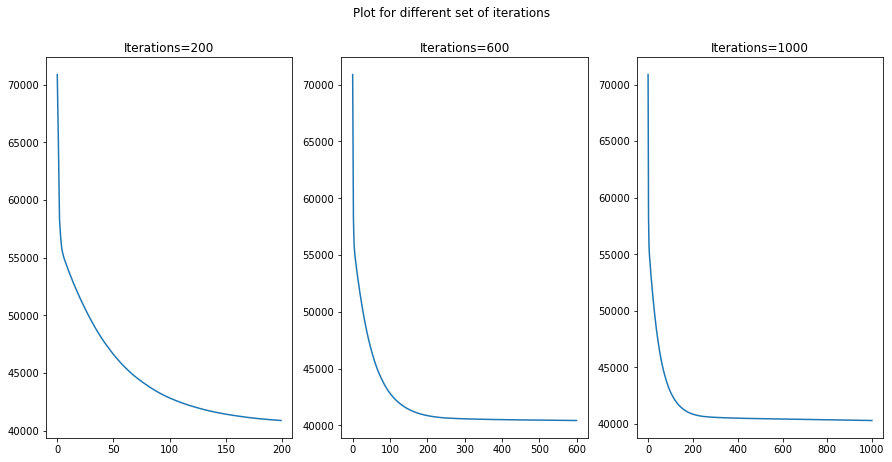

In [15]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,7))
fig.suptitle('Plot for different set of iterations')
ax1.plot(list(range(200)),n_cost1)
ax1.set_title('Iterations=200')
ax2.plot(list(range(600)),n_cost2)
ax2.set_title('Iterations=600')
ax3.plot(list(range(1000)),n_cost3)
ax3.set_title('Iterations=1000')



**I am taking number of iterations as 600 as almost gives me the same time of convergence w.r.t 1000 iterations and is less expensive on the machine.**

<ipython-input-13-c60a14b932ac>:19: RuntimeWarning: invalid value encountered in subtract
  B = B - (mu*gradient)


Text(0.5, 1.0, 'alpha=0.0001')

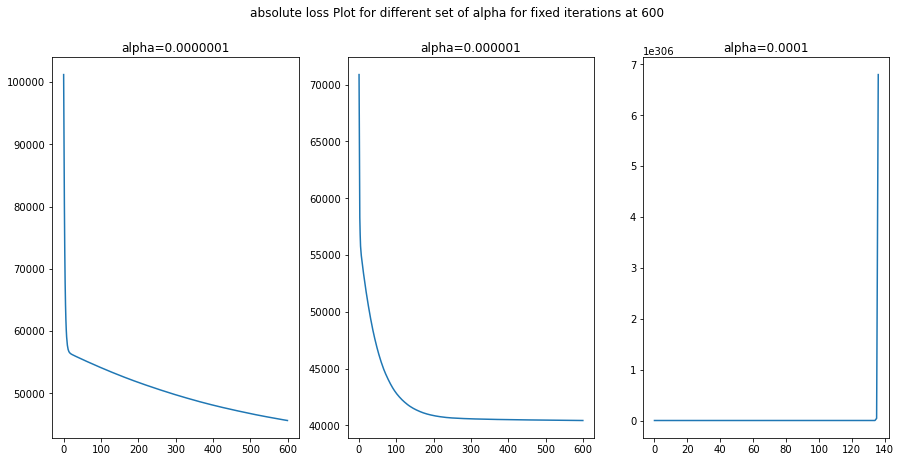

In [16]:
newB4,n_cost4 = minimise_GD(X, y, B, mu = 0.0000001, iterations=600)
newB5,n_cost5 = minimise_GD(X, y, B, mu = 0.000001, iterations=600)
newB6,n_cost6 = minimise_GD(X, y, B, mu = 0.0001, iterations=600)


fig, (ax4, ax5,ax6) = plt.subplots(1, 3,figsize=(15,7))
fig.suptitle('absolute loss Plot for different set of alpha for fixed iterations at 600')
ax4.plot(list(range(600)),n_cost4)
ax4.set_title('alpha=0.0000001')
ax5.plot(list(range(600)),n_cost5)
ax5.set_title('alpha=0.000001')
ax6.plot(list(range(600)),n_cost6)
ax6.set_title('alpha=0.0001')

**As we can see that alpha (in my case mu value) has to be set to very small value like 10^-5 or lesser or else the iterations vs loss graph inverses and we don not get the optimal convergence that we want to. Therefore, while calculatinfg absolute loss with 3 different mu we got the above graphs and the smaller the mu, the better it is**

**In each iteration step also calculate RMSE on test set RMSE and plot and explain the graph**

In [19]:
def RMSE(testing_data,B):  #RMSE Function for test dataset
    y_pred=testing_data.dot(B)
    RMSE= np.sum(np.sqrt(((y_pred - y_test) ** 2)))
    return RMSE


<ipython-input-20-ac9df993204b>:9: RuntimeWarning: invalid value encountered in subtract
  B = B - (mu*gradient)


Text(0.5, 1.0, 'alpha=0.0001')

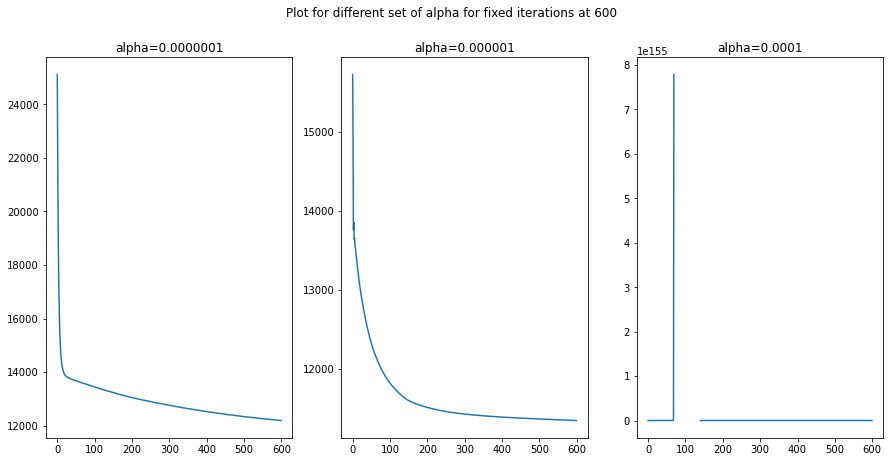

In [20]:
def minimise_GD_test(X, y, B, mu, iterations):
    Rmse_history = [0] * iterations       # seperate minimise_GD for the calculation of test dataset
    m = len(y)
 
    for iteration in range(iterations):
        h = X.dot(B)
        loss = (h-y)
        gradient = X.T.dot(loss) /m
        B = B - (mu*gradient)
        Rmse = RMSE(X, B)
        Rmse_history[iteration] = Rmse
    
    return Rmse_history



B=np.zeros([3,1],dtype=float)
rmse_his1=minimise_GD_test(testing_data,y_test,B,mu=0.0000001,iterations=600)
rmse_his2=minimise_GD_test(testing_data,y_test,B,mu=0.000001,iterations=600)
rmse_his3=minimise_GD_test(testing_data,y_test,B,mu=0.0001,iterations=600)


#print(y_pred)
fig, (ax7, ax8,ax9) = plt.subplots(1, 3,figsize=(15,7))
fig.suptitle('Plot for different set of alpha for fixed iterations at 600')
ax7.plot(list(range(600)),rmse_his1)
ax7.set_title('alpha=0.0000001')
ax8.plot(list(range(600)),rmse_his2)
ax8.set_title('alpha=0.000001')
ax9.plot(list(range(600)),rmse_his3)
ax9.set_title('alpha=0.0001')

**The similar findings for absolute loss also apply for RMSE values, with lesser value of alpha we get better RMSE values**

**TASK3** 

**1) Stepsize Backtracking**|

In [21]:
#Defining various functions required for steplength_backtracking

def gradient(X,y,B):
    g=(2*X.T).dot(X.dot(B)-y)
    return g


In [24]:
def GD(X, y, B, mu, iterations):
    m = len(y)
    
    for iteration in range(iterations):
 
        h = X.dot(B)
        loss = (h-y)
        #loss= (y-h)
        gradient = X.T.dot(loss) /m
        #gradient= ((2*X.T).dot(loss))/m
        B = B - (mu*gradient)
        
    return B

b=GD(X,y,B,0.000001, iterations=100)
print(b)

[[0.26588192]
 [0.03396924]
 [0.25070033]]


In [25]:
#These functions are slightly modified GD Functions and its done to make the while loop of backtracking easier to understand

def fun_x(X,y):
    m=len(y)
    A=np.zeros([3,1],dtype=float)
    Z=np.sum((X.dot(A)-y)**2)/(2*m)
    
    #J=np.absolute(y-X.dot(B))
    return Z

def f_grad(b):
    
    L=np.sum(b)
    return L

The mu value which we get from stepsize backtracking is 2.5e-09


Text(0.5, 1.0, 'mu value= 2.5 e-09')

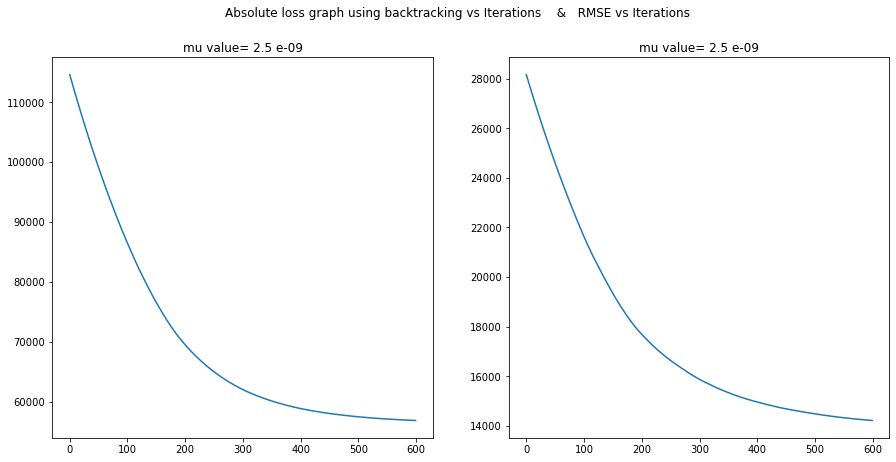

In [26]:
#I am taking alpha=0.0002 and beta=0.00005

def stepsize_backtracking(X,y,alpha=0.00002, beta=0.00005):
    mu_n=1
  
    while(f_grad(b) > (fun_x(X,y)- (alpha*mu_n*(gradient(X,y,B).T).dot(gradient(X,y,B))))):  #The main while condition from the slides
          mu_n=mu_n*beta 
    return mu_n
new_mu=stepsize_backtracking(X,y)
print("The mu value which we get from stepsize backtracking is",new_mu)
bias,ite_loss=minimise_GD(X, y, B,new_mu,600)
rmse_his=minimise_GD_test(testing_data,y_test,B,new_mu,iterations=600)


fig, (ax10, ax11) = plt.subplots(1, 2,figsize=(15,7))
fig.suptitle('Absolute loss graph using backtracking vs Iterations    &   RMSE vs Iterations')
ax10.plot(list(range(600)),ite_loss)
ax10.set_title('mu value= 2.5 e-09')
ax11.plot(list(range(600)),rmse_his)
ax11.set_title('mu value= 2.5 e-09')

Therefore, as we can see a similar pattern is followed and the new mu value which we got from this stepsize algorithm is very small too, so the fitting will be accirate to the model only if mu s very small

**Steplength Bolddriver**

In [29]:
#Various sub functions for Stepsize bolddriver algorithm


def f_grad_sbd(sbd_mu):
    b_sbd=GD(X,y,B,sbd_mu, iterations=600)
    L=np.sum(b_sbd)
    return L

b_sbd=GD(X,y,B,sbd_mu, iterations=600)
print(b_sbd)

[[0.06155103]
 [0.08408985]
 [0.06059963]]


The mu value which we get from stepsize bolddriver is 2.2000000000000002e-08


Text(0.5, 1.0, 'mu value= 2.2 e-08')

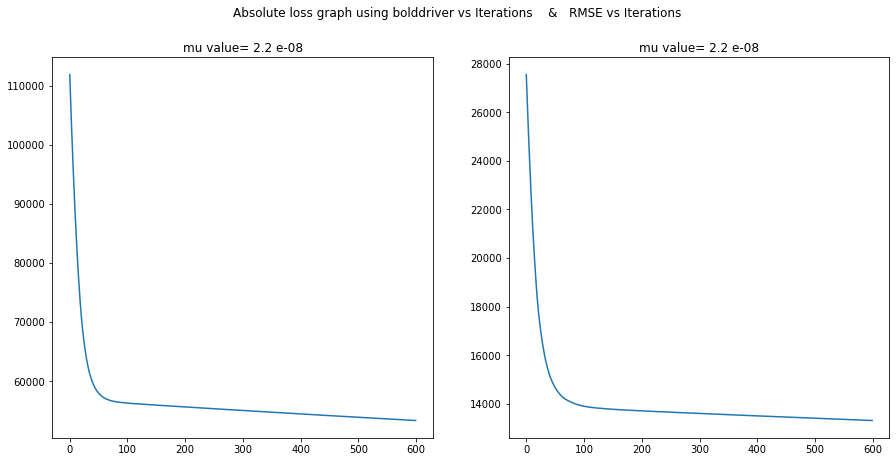

In [30]:
def steplength_bolddriver(X,y,mu_old, mu_plus=1.1,mu_minus=0.5):
    mu_n=mu_old*mu_plus
    
    while(fun_x(X,y) - f_grad_sbd(mu_n) <= 0):
          mu_n=mu_n*mu_minus
    return mu_n

sbd_mu=steplength_bolddriver(X,y,mu_old=0.00000002)
print("The mu value which we get from stepsize bolddriver is",sbd_mu)
bias,ite_los=minimise_GD(X, y, B,sbd_mu,600)
rmse_hi=minimise_GD_test(testing_data,y_test,B,sbd_mu,iterations=600)


fig, (ax12, ax13) = plt.subplots(1, 2,figsize=(15,7))
fig.suptitle('Absolute loss graph using bolddriver vs Iterations    &   RMSE vs Iterations')
ax12.plot(list(range(600)),ite_los)
ax12.set_title('mu value= 2.2 e-08')
ax13.plot(list(range(600)),rmse_hi)
ax13.set_title('mu value= 2.2 e-08')



(3, 1)


Text(0.5, 1.0, 'mu value= 2.2 e-08')

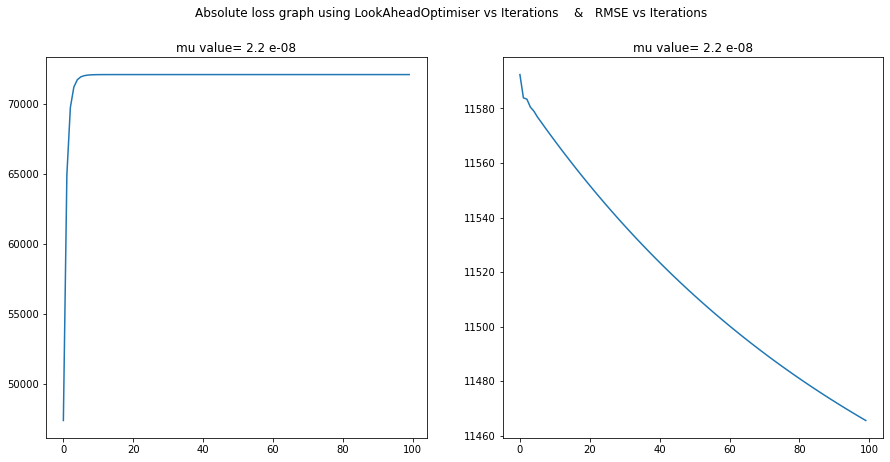

In [49]:
def LookAheadOptimiser(X,y,epochs):
    
    fast_weights=np.zeros([3,1],dtype=float)
    slow_weights=np.zeros([3,1],dtype=float)
    print(np.shape(slow_weights))
    l_hist=[]
    rmse_his=[]
    alpha=0.5                       # I am taking slow weight stepsize as 0.5 as that is the same one taken in the given paper
    slow_temp=slow_weights
    
    for j in range (epochs):
        fast_weights=GD(X,y,B,0.000001, iterations=100)
        slow_weights=slow_weights+alpha*(fast_weights-slow_weights)
                                                            #mini batch is not done because the dataset we are using
                                                         #is not very huge and in my opinion randomisation is not necessary
        l_hist.append(LG(X,y,slow_temp)-LG(X,y,slow_weights))
        rmse_hist=minimise_GD_test(testing_data,y_test,slow_weights,mu=0.000001,iterations=100)
        
    return slow_weights,l_hist,rmse_hist


        

slow_w,loss,rms=LookAheadOptimiser(X,y,100)

#print(slow_w,loss)

fig, (ax14, ax15) = plt.subplots(1, 2,figsize=(15,7))
fig.suptitle('Absolute loss graph using LookAheadOptimiser vs Iterations    &   RMSE vs Iterations')
ax14.plot(list(range(100)),loss)
ax14.set_title('mu value= 2.2 e-08')
ax15.plot(list(range(100)),rms)
ax15.set_title('mu value= 2.2 e-08')

The steep change in values for covergence is what makes LookAheadOptimiser a better optimisation technique/Steplength decider.

**So, based on RMSE the clear winner is Look AheadOptimiser, wherein the RMSE goes below 11k within 100 iterations but that is not the case in others. Second comes in Bolddriver technique.**

References:-
https://www.geeksforgeeks.org/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python/
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
https://medium.com/@shuklapratik22/linear-regression-with-gradient-descent-from-scratch-d03dfa90d04c
https://github.com/chizhik/Linear-Regression-and-Logistic-Regression/blob/master/regressions.ipynb
https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a

